In [ ]:
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import datetime

import warnings             # to get rid of warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the data from the file
**didn't forget to parse the column "dt" to datestamp** 

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Data Misc/GlobalLandTemperaturesByCity.csv" , parse_dates=["dt"])
print(data.shape)
data.head()

(8599212, 7)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


## Check data accuracy


In [6]:
data.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

## let's check this missing values properties

In [7]:
missing_values = data[data["AverageTemperature"].isna() == True ]
print(missing_values.shape)
missing_values.head(5)

(364130, 7)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
missing_values["City"].value_counts()

## Assumed that , the missing values not signeficant in our dataset 
* so , we decided to drop them

In [8]:
data.dropna(inplace=True)
data.shape

(8235082, 7)

# let's perform some descriptive analysis on our data set

## Q1 . What are the most common Countries in our data set ?
## Q2 . How many major cities they have ?
## Q3 . What are the hottest cities and, What are the coldest ones ?

Text(0.5, 0, '(The red line refers to the Mean)')

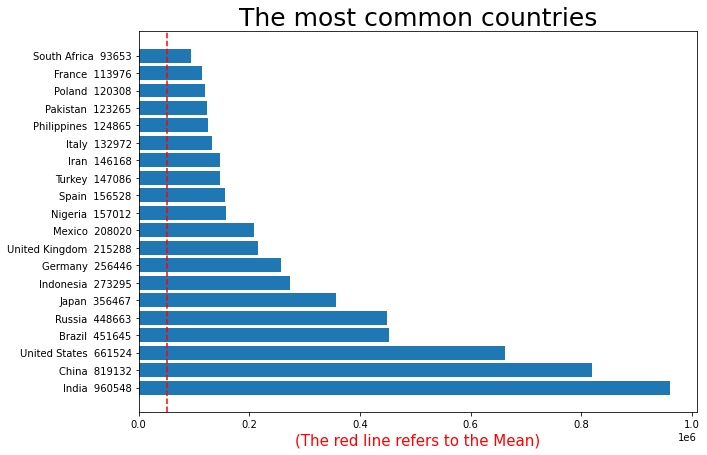

In [10]:
# Q1 . What are the most common Countries in our data set ?
most_countries = data["Country"].value_counts()[:20]
cwc = []
for i in zip(most_countries.index , most_countries.values):
    cit = i[0]+"  "+str(i[1])
    cwc.append(cit)
plt.figure(figsize=(10,7))
plt.barh(cwc , most_countries.values)
plt.axvline(x=data["Country"].value_counts().values.mean() , color="red" ,linestyle="--" )
plt.title("The most common countries" , fontsize=25)
plt.xlabel("(The red line refers to the Mean)" , c="red" , fontsize=15)

In [11]:
maj_count = []
cwc = []
for i in most_countries.index:
    temp = data[data["Country"] == i]["City"]
    maj_count.append(len(temp.unique()))
    cit = i+"  "+str(len(temp.unique()))
    cwc.append(cit)
    

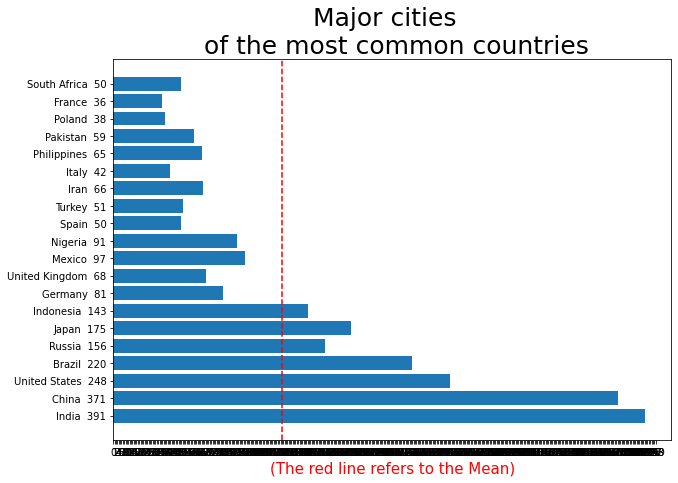

In [16]:
plt.figure(figsize=(10,7))
plt.barh(cwc , maj_count)
plt.axvline(x=(int(sum(maj_count)/len(maj_count))) , color="red" ,linestyle="--" )
tex = "Major cities  \n of the most common countries" 
plt.title(tex, fontsize=25 )
plt.xlabel("(The red line refers to the Mean)" , c="red" , fontsize=15)
xticks = plt.xticks(range(400))

In [17]:
temp = data.groupby(["Country" , "City"]).mean()
hottest = temp.sort_values(["AverageTemperature"] , ascending=False)[:20]
hottest = hottest.sort_values(["AverageTemperature"] , ascending=True)
coldest = temp.sort_values(["AverageTemperature"] , ascending=True)[:20]
coldest = coldest.sort_values(["AverageTemperature"] , ascending=False)



hottest_index = []
for i in hottest.index:
    cit = i[1] + " , " + i[0]
    hottest_index.append(cit)
    
coldest_index = []
for i in coldest.index:
    cit = i[1] + " , " + i[0]
    coldest_index.append(cit)

Text(6, 17, '(Global average temperature)')

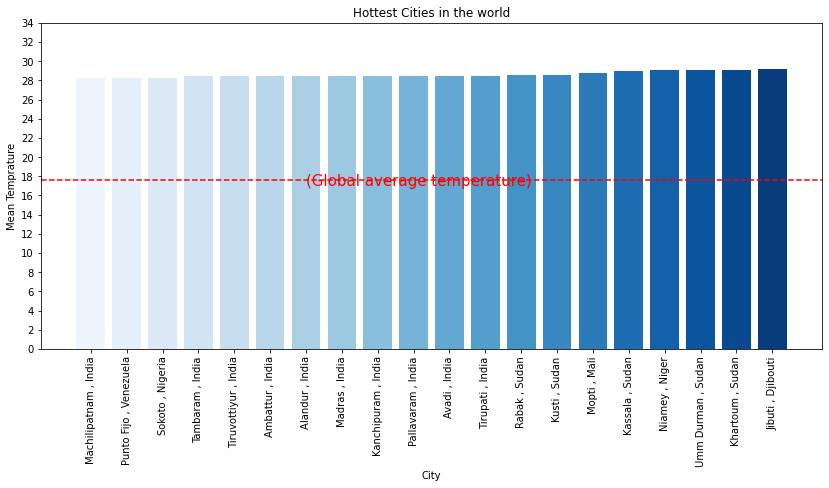

In [20]:
plt.figure(figsize=(14,6))

plt.bar(hottest_index , hottest.values[:,0]
        , color=sns.color_palette("Blues" , len(hottest) ))
plt.axhline(y=temp["AverageTemperature"].mean() , color="red" , linestyle="--")
plt.yticks(np.arange(0,35,2))
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Mean Temperature")
plt.title("Hottest Cities in the world")
plt.text(6,17,"(Global average temperature)" , color="red" , fontsize=15 )


Text(6, 17, '(Global average temprature)')

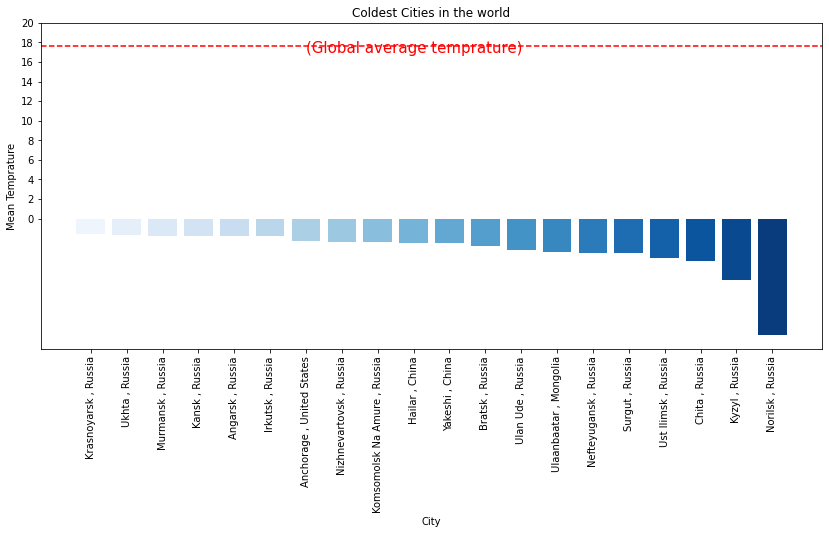

In [19]:
plt.figure(figsize=(14,6))

plt.bar(coldest_index , coldest.values[:,0]
        , color=sns.color_palette("Blues" , len(coldest) ))
plt.axhline(y=temp["AverageTemperature"].mean() , color="red" , linestyle="--")
plt.yticks(np.arange(0,21,2))
plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Mean Temprature")
plt.title("Coldest Cities in the world")
plt.text(6,17,"(Global average temperature)" , color="red" , fontsize=15 )

# Now , let's study the climate of my country , **Egypt** .
* ADDED a new column "Month" to the dataframe which we need in our analysis
* knowen that , the country here is Egypt so that dropped the column "Country"

In [21]:
egypt_data = data[data["Country"] == "Egypt"]
egypt_data["Month"] = pd.DatetimeIndex(egypt_data["dt"]).month
egypt_data.drop(columns=["Country"] , axis=1 , inplace=True)
egypt_data.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude,Month
184859,1791-05-01,20.772,1.848,Alexandria,31.35N,30.16E,5
184860,1791-06-01,24.029,1.945,Alexandria,31.35N,30.16E,6
184861,1791-07-01,25.483,1.479,Alexandria,31.35N,30.16E,7
184862,1791-08-01,26.797,1.435,Alexandria,31.35N,30.16E,8
184863,1791-09-01,24.464,1.987,Alexandria,31.35N,30.16E,9


## First , let's get a highlight about the climate of Egypt 


In [22]:
egypt_data["AverageTemperature"].describe()

count    45608.000000
mean        21.487249
std          5.653513
min          8.050000
25%         16.251000
50%         21.857000
75%         26.298000
max         36.224000
Name: AverageTemperature, dtype: float64

### Sience , Egypt has three cities in our dataset then we will study the main two cities (Alexandria , Cairo) separatelly

# **Alexandria**

knowen that : Alex lies in **Latitude:31.35N** and **Longitude:30.16E**   
we droped thier two columns ...

In [23]:
alex = egypt_data[egypt_data["City"] == "Alexandria"]
alex.drop(columns=["City" , "Latitude" , "Longitude"] , axis=1 , inplace=True)
alex.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Month
184859,1791-05-01,20.772,1.848,5
184860,1791-06-01,24.029,1.945,6
184861,1791-07-01,25.483,1.479,7
184862,1791-08-01,26.797,1.435,8
184863,1791-09-01,24.464,1.987,9


In [24]:
alex["AverageTemperature"].describe()

count    2666.000000
mean       20.312617
std         4.559545
min        10.227000
25%        15.987250
50%        20.463500
75%        24.612500
max        28.806000
Name: AverageTemperature, dtype: float64

### Check for outliers 

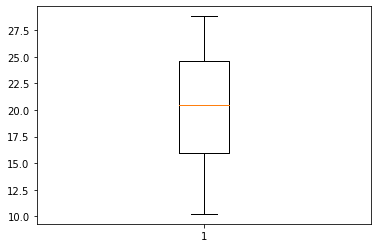

In [25]:
fig = plt.boxplot(alex["AverageTemperature"])

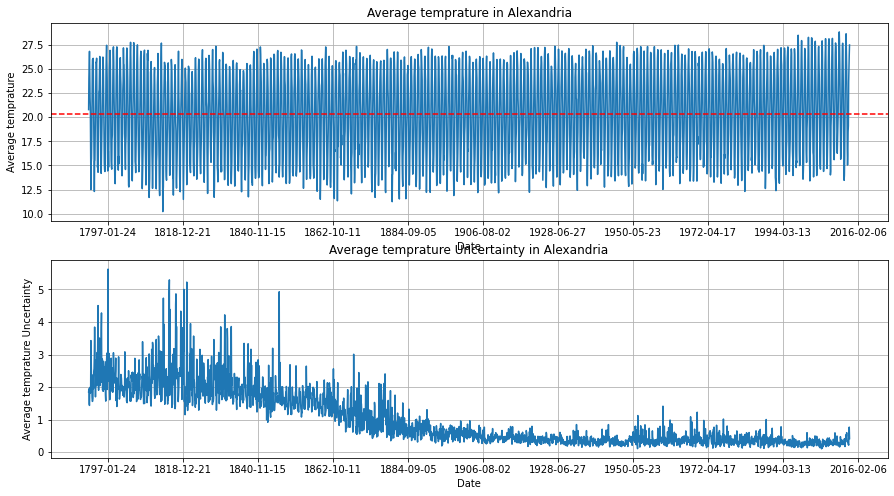

In [26]:
fig , ax = plt.subplots(2,figsize=(15,8))
ax[0].plot(alex["dt"] ,alex["AverageTemperature"])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(12))
ax[0].axhline(y = alex["AverageTemperature"].mean() , color="red" , linestyle="--")
ax[0].set_title("Average temprature in Alexandria")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Average temprature")
ax[0].grid()

ax[1].plot(alex["dt"] ,alex["AverageTemperatureUncertainty"])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(12))
#ax[0].axhline(y = alex["AverageTemperatureUncertainty"].mean() , color="red" , linestyle="--")
ax[1].set_title("Average temprature Uncertainty in Alexandria")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Average temprature Uncertainty")
ax[1].grid()

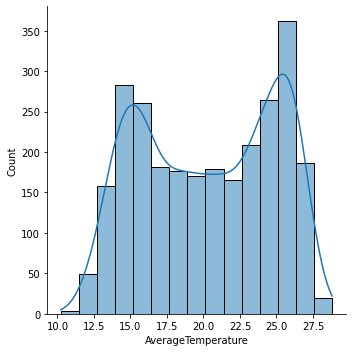

In [27]:
sns.displot(alex["AverageTemperature"] , kde=True)

**As showen in the previous plot the uncertainty before 1900 is very high so that we will drop it to get real resulst about the climate in Alexandria**

In [28]:
alex = alex[alex["dt"] >=  pd.Timestamp('1900-01-01 00:00:00')]

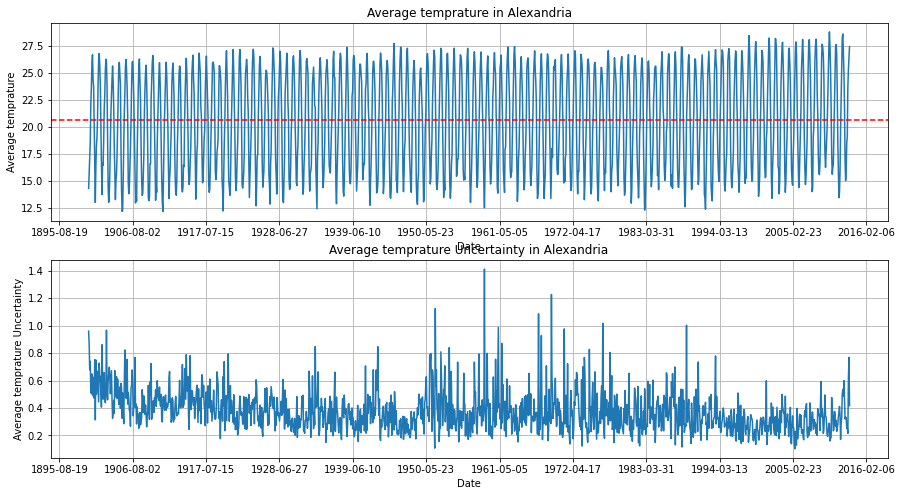

In [29]:
fig , ax = plt.subplots(2,figsize=(15,8))
ax[0].plot(alex["dt"] ,alex["AverageTemperature"])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(12))
ax[0].axhline(y = alex["AverageTemperature"].mean() , color="red" , linestyle="--")
ax[0].set_title("Average temprature in Alexandria")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Average temprature")
ax[0].grid()

ax[1].plot(alex["dt"] ,alex["AverageTemperatureUncertainty"])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(12))
#ax[0].axhline(y = alex["AverageTemperatureUncertainty"].mean() , color="red" , linestyle="--")
ax[1].set_title("Average temprature Uncertainty in Alexandria")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Average temprature Uncertainty")
ax[1].grid()

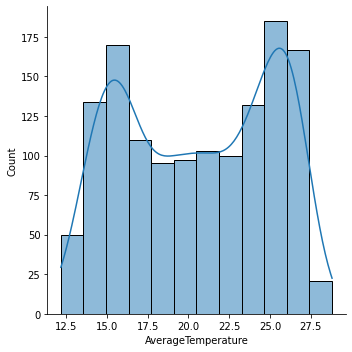

In [30]:
sns.displot(alex["AverageTemperature"] , kde=True)

## The first step is to try to extract some main features of climate in Alexandria 
* Q1 , what is the hottest month of the year ? and what is the coldest month of the year ?

In [32]:
temp = alex.groupby(["Month"]).mean()
temp.drop(columns=["AverageTemperatureUncertainty"] , axis=1 , inplace=True)
temp = temp.sort_values(["AverageTemperature"])

Text(0.5, 1.0, 'Average Temperature per Month in Alexandria')

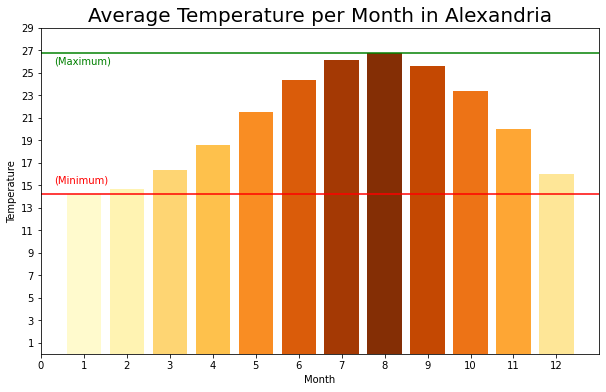

In [33]:
plt.figure(figsize=(10,6))
plt.bar(temp.index , temp["AverageTemperature"].values , color=sns.color_palette("YlOrBr",len(temp.index) ))

plt.axhline(y=temp["AverageTemperature"].values.min() , color="red")
plt.text(.3,temp["AverageTemperature"].values.min()+1 , "(Minimum)" , color='red')
plt.axhline(y=temp["AverageTemperature"].values.max() , color="green")
plt.text(.3,temp["AverageTemperature"].values.max()-1 , "(Maximum)" , color='green')

xticks = plt.xticks(range(13))
yticks = plt.yticks(np.arange(1 , 30 ,2))
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Average Temperature per Month in Alexandria" , fontsize=20)

***it's clear that , January is the coldest month in the year , and August is the hottest one***

# **Cairo** (the capital)

   knowen that : Cairo lies in **Latitude:29.74N** and **Longitude:31.38E**   
we droped thier two columns ...

In [34]:
cairo = egypt_data[egypt_data["City"] == "Cairo"]
cairo.drop(columns=["City" , "Latitude" , "Longitude"] , axis=1 , inplace=True)

#chossing only data after 1900
cairo = cairo[cairo["dt"] >=  pd.Timestamp('1900-01-01 00:00:00')]
cairo.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Month
1290802,1900-01-01,12.829,0.818,1
1290803,1900-02-01,15.434,0.512,2
1290804,1900-03-01,18.151,0.436,3
1290805,1900-04-01,21.031,0.492,4
1290806,1900-05-01,25.481,0.597,5


In [35]:
alex["AverageTemperature"].describe()

count    1364.000000
mean       20.607729
std         4.528638
min        12.171000
25%        16.215250
50%        20.816000
75%        24.919250
max        28.806000
Name: AverageTemperature, dtype: float64

## Check for outliers

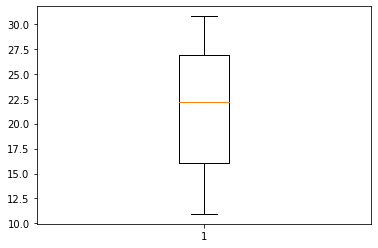

In [36]:
fig = plt.boxplot(cairo["AverageTemperature"])

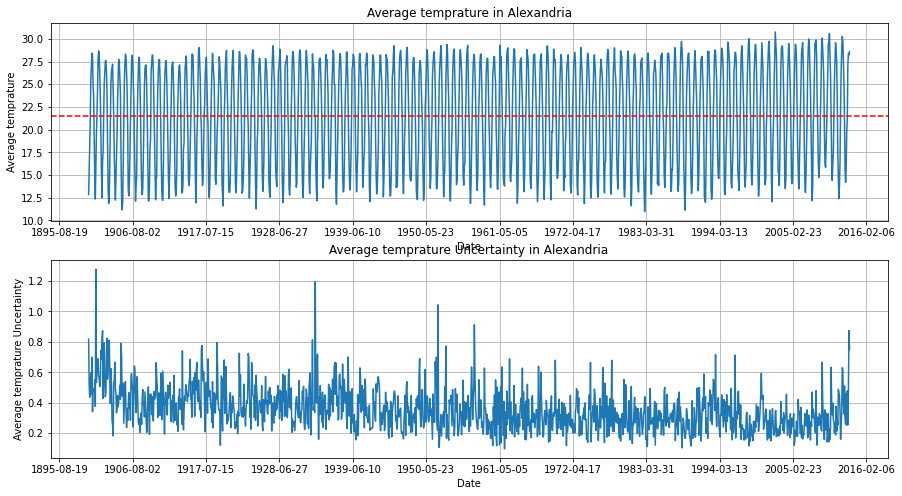

In [37]:
fig , ax = plt.subplots(2,figsize=(15,8))
ax[0].plot(cairo["dt"] ,cairo["AverageTemperature"])
ax[0].xaxis.set_major_locator(plt.MaxNLocator(12))
ax[0].axhline(y = cairo["AverageTemperature"].mean() , color="red" , linestyle="--")
ax[0].set_title("Average temprature in Alexandria")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Average temprature")
ax[0].grid()

ax[1].plot(cairo["dt"] ,cairo["AverageTemperatureUncertainty"])
ax[1].xaxis.set_major_locator(plt.MaxNLocator(12))
#ax[0].axhline(y = alex["AverageTemperatureUncertainty"].mean() , color="red" , linestyle="--")
ax[1].set_title("Average temprature Uncertainty in Alexandria")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Average temprature Uncertainty")
ax[1].grid()

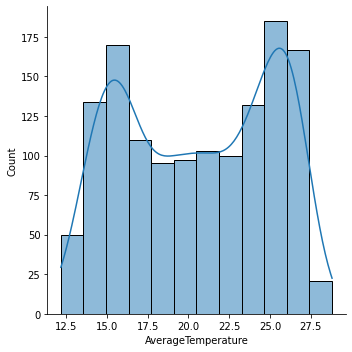

In [38]:
sns.displot(alex["AverageTemperature"] , kde=True)

## The first step is to try to extract some main features of climate in Cairo 
* Q1 , what is the hottest month of the year ? and what is the coldest month of the year ?

In [39]:
temp = cairo.groupby(["Month"]).mean()
temp.drop(columns=["AverageTemperatureUncertainty"] , axis=1 , inplace=True)
temp = temp.sort_values(["AverageTemperature"])

Text(0.5, 1.0, 'Average Temprature per Month in Cairo')

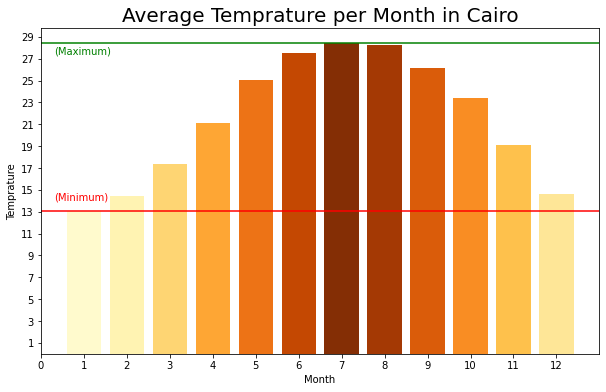

In [40]:
plt.figure(figsize=(10,6))
plt.bar(temp.index , temp["AverageTemperature"].values , color=sns.color_palette("YlOrBr",len(temp.index) ))

plt.axhline(y=temp["AverageTemperature"].values.min() , color="red")
plt.text(.3,temp["AverageTemperature"].values.min()+1 , "(Minimum)" , color='red')
plt.axhline(y=temp["AverageTemperature"].values.max() , color="green")
plt.text(.3,temp["AverageTemperature"].values.max()-1 , "(Maximum)" , color='green')

xticks = plt.xticks(range(13))
yticks = plt.yticks(np.arange(1 , 30 ,2))
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.title("Average Temperature per Month in Cairo" , fontsize=20)